In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Classification - Employee Attrition dataset

Data source: https://www.kaggle.com/patelprashant/employee-attrition

In [3]:
attrition = pd.read_csv('Employee-Attrition.csv')
attrition.head(3)
attrition.shape

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  

[3 rows x 33 columns]

(1470, 33)

In [4]:
attrition.info()
# There are no missing values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

### Impute Missing Values in dataset

Create Missing Values into dataset

In [5]:
np.random.seed(1234)
nan_mat2 = np.random.random(attrition[["Age",'BusinessTravel','DailyRate','HourlyRate','Department','Education'
                                       ,'EnvironmentSatisfaction','Gender','MonthlyIncome','MonthlyRate','OverTime','StockOptionLevel'
                                       ,'TotalWorkingYears','YearsAtCompany']].shape) < 0.1
nan_mat2.sum()

attrition_NaN = attrition[["Age",'BusinessTravel','DailyRate','HourlyRate','Department','Education',
                           'EnvironmentSatisfaction','Gender','MonthlyIncome','MonthlyRate','OverTime','StockOptionLevel',
                           'TotalWorkingYears','YearsAtCompany']].mask(nan_mat2)
a = attrition.drop(["Age",'BusinessTravel','DailyRate','HourlyRate','Department','Education',
                           'EnvironmentSatisfaction','Gender','MonthlyIncome','MonthlyRate','OverTime','StockOptionLevel',
                           'TotalWorkingYears','YearsAtCompany'],axis=1)
attrition_new = pd.concat([attrition_NaN,a],axis=1)
attrition_new.shape
attrition_new.isnull().sum()

2148

(1470, 33)

Age                         141
BusinessTravel              167
DailyRate                   142
HourlyRate                  155
Department                  149
Education                   156
EnvironmentSatisfaction     150
Gender                      160
MonthlyIncome               164
MonthlyRate                 140
OverTime                    164
StockOptionLevel            155
TotalWorkingYears           158
YearsAtCompany              147
Attrition                     0
DistanceFromHome              0
EducationField                0
EmployeeNumber                0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
NumCompaniesWorked            0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsInCurrentRole            0
YearsSin

In [6]:
df_imputed = attrition_new

The following show how we imputed NaN values in the dataset:

In [7]:
# Impute missing values in DailyRate
attrition_new[['JobRole','JobLevel','DailyRate']][9:18]  #There are 2 rows that have NaN values in DailyRate column

attrition_new.groupby(['JobRole','JobLevel'])[['DailyRate']].mean() 
# We will replace NaN values in DailyRate by the mean of DailyRate grouped by JobRole and JobLevel.

JobRole  JobLevel  DailyRate
9   Healthcare Representative         2        NaN
10      Laboratory Technician         1      809.0
11      Laboratory Technician         2      153.0
12         Research Scientist         1      670.0
13      Laboratory Technician         1     1346.0
14      Laboratory Technician         1      103.0
15     Manufacturing Director         3     1389.0
16         Research Scientist         1      334.0
17      Laboratory Technician         1        NaN

DailyRate
JobRole                   JobLevel             
Healthcare Representative 2          823.267606
                          3          938.121951
                          4          692.222222
Human Resources           1          768.793103
                          2          693.272727
                          3          607.800000
Laboratory Technician     1          840.139665
                          2          674.560000
                          3          800.666667
Manager                   3          886.454545
                          4          809.954545
                          5          706.052632
Manufacturing Director    2          776.297619
                          3          826.736842
                          4          749.625000
Research Director         3          716.360000
                          4          775.916667
                          5          978.727273
Research Scientist        1          798.302752
                          2          855.254902
                          3         1339.000000
Sales Executive           2          799.100962
                          3          829.478261
                          4          763.083333
Sales Representative      1          820.357143
                          2          939.285714

In [8]:
# impute DailyRate
df_imputed['DailyRate'] = attrition_new['DailyRate'].fillna(attrition_new.groupby(['JobRole','JobLevel'])['DailyRate'].transform('mean'))

df_imputed[['JobRole','JobLevel','DailyRate']][9:18] 
# NaN values in DailyRate row 9 and 17 have been replaced by the mean DailyRate of the groupby function above.

JobRole  JobLevel    DailyRate
9   Healthcare Representative         2   823.267606
10      Laboratory Technician         1   809.000000
11      Laboratory Technician         2   153.000000
12         Research Scientist         1   670.000000
13      Laboratory Technician         1  1346.000000
14      Laboratory Technician         1   103.000000
15     Manufacturing Director         3  1389.000000
16         Research Scientist         1   334.000000
17      Laboratory Technician         1   840.139665

Apply the same method to other numerical features including HourlyRate, MonthlyIncome, MonthlyRate, Age, TotalWorkingYears, and YearsAtCompany

In [9]:
df_imputed['HourlyRate'] = df_imputed['HourlyRate'].fillna(df_imputed.groupby(['JobRole','JobLevel'])['HourlyRate'].transform('mean'))
df_imputed['MonthlyIncome'] = df_imputed['MonthlyIncome'].fillna(df_imputed.groupby(['JobRole','JobLevel'])['MonthlyIncome'].transform('mean'))
df_imputed['MonthlyRate'] = df_imputed['MonthlyRate'].fillna(df_imputed.groupby(['JobRole','JobLevel'])['MonthlyRate'].transform('mean'))
df_imputed['Age'] = df_imputed['Age'].fillna(df_imputed.groupby('JobLevel')['Age'].transform('mean'))
df_imputed['TotalWorkingYears'] = df_imputed['TotalWorkingYears'].fillna(df_imputed.groupby(['JobRole','JobLevel'])['TotalWorkingYears'].transform('mean'))
df_imputed['YearsAtCompany'] = df_imputed['YearsAtCompany'].fillna(df_imputed.groupby(['JobRole','JobLevel'])['YearsAtCompany'].transform('mean'))

df_imputed.isnull().sum()

Age                           0
BusinessTravel              167
DailyRate                     0
HourlyRate                    1
Department                  149
Education                   156
EnvironmentSatisfaction     150
Gender                      160
MonthlyIncome                 0
MonthlyRate                   0
OverTime                    164
StockOptionLevel            155
TotalWorkingYears             0
YearsAtCompany                1
Attrition                     0
DistanceFromHome              0
EducationField                0
EmployeeNumber                0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
NumCompaniesWorked            0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsInCurrentRole            0
YearsSin

In [10]:
# Impute missing values in OverTime

# Find the mode value in OverTime column grouped by JobRole and JobLevel
attrition_new.groupby(['JobRole','JobLevel'])['OverTime'].apply(lambda x: x.value_counts().index[0]).reset_index()

JobRole  JobLevel OverTime
0   Healthcare Representative         2       No
1   Healthcare Representative         3       No
2   Healthcare Representative         4       No
3             Human Resources         1       No
4             Human Resources         2       No
5             Human Resources         3       No
6       Laboratory Technician         1       No
7       Laboratory Technician         2       No
8       Laboratory Technician         3       No
9                     Manager         3       No
10                    Manager         4       No
11                    Manager         5       No
12     Manufacturing Director         2       No
13     Manufacturing Director         3       No
14     Manufacturing Director         4      Yes
15          Research Director         3       No
16          Research Director         4       No
17          Research Director         5       No
18         Research Scientist         1       No
19         Research Scientist         2       No
20         Research Scientist         3       No
21            Sales Executive         2       No
22            Sales Executive         3       No
23            Sales Executive         4       No
24       Sales Representative         1       No
25       Sales Representative         2       No

Based on the groupby table above, only Manufacturing Director job role at job level 4 has the mode overtime value which is Yes. Because there is only 1 instance that has NaN in OverTime for Manufacturing Director-level 4 in this dataset, we decided to replace all NaN values in OverTime column with "No".

In [11]:
# Only 1 instance that has JobRole of Manufacturing Director-level 4 and NaN value in OverTime.
df_imputed[['JobRole','JobLevel','OverTime']][(df_imputed.JobRole == 'Manufacturing Director') 
              & (df_imputed.JobLevel == 4) & (df_imputed.OverTime.isnull())]

JobRole  JobLevel OverTime
971  Manufacturing Director         4      NaN

In [12]:
# Replace all missing values in OverTime by "No"
df_imputed['OverTime'] = df_imputed['OverTime'].fillna("No")
df_imputed['OverTime'].isnull().sum()

0

Apply a different method to categorical features including Department, BusinessTravel, Education, EnvironmentSatisfaction, Gender, and StockOptionLevel

In [13]:
def fast_mode(df, key_cols, value_col):
    return (df.groupby(key_cols + [value_col]).size() 
              .to_frame('counts').reset_index() 
              .sort_values('counts', ascending=False) 
              .drop_duplicates(subset=key_cols)).drop(columns='counts')

In [14]:
# Impute missing values in Department
df_imputed[['JobRole','Department']][10:20] #there is 1 NaN values in these rows

df_imputed.groupby('JobRole')['Department'].apply(lambda x: x.value_counts().index[0]).reset_index() #find the mode values in Department grouped by JobRole 

# Then, replace missing values in Department by the mode values of department grouped by JobRole

JobRole              Department
10   Laboratory Technician                     NaN
11   Laboratory Technician  Research & Development
12      Research Scientist  Research & Development
13   Laboratory Technician  Research & Development
14   Laboratory Technician  Research & Development
15  Manufacturing Director  Research & Development
16      Research Scientist  Research & Development
17   Laboratory Technician  Research & Development
18                 Manager                   Sales
19      Research Scientist  Research & Development

JobRole              Department
0  Healthcare Representative  Research & Development
1            Human Resources         Human Resources
2      Laboratory Technician  Research & Development
3                    Manager  Research & Development
4     Manufacturing Director  Research & Development
5          Research Director  Research & Development
6         Research Scientist  Research & Development
7            Sales Executive                   Sales
8       Sales Representative                   Sales

In [15]:
# impute missing values in Department by the mode values of Department by JobRole
df_imputed.loc[df_imputed.Department.isnull(), 'Department'] = df_imputed.JobRole.map(fast_mode(df_imputed, ['JobRole'], 'Department').set_index('JobRole').Department)
df_imputed[['JobRole','Department']][10:20] 
# the NaN value in row 10 has been replaced with the mode value of department grouped by Laboratory Technician role

JobRole              Department
10   Laboratory Technician  Research & Development
11   Laboratory Technician  Research & Development
12      Research Scientist  Research & Development
13   Laboratory Technician  Research & Development
14   Laboratory Technician  Research & Development
15  Manufacturing Director  Research & Development
16      Research Scientist  Research & Development
17   Laboratory Technician  Research & Development
18                 Manager                   Sales
19      Research Scientist  Research & Development

Apply the same method as above for BusinessTravel, Education, Education, EnvironmentSatisfaction, Gender, and StockOptionLevel

In [16]:
df_imputed.loc[df_imputed.BusinessTravel.isnull(), 'BusinessTravel'] = df_imputed.JobRole.map(fast_mode(df_imputed, ['JobRole'], 'BusinessTravel').set_index('JobRole').BusinessTravel)
df_imputed.loc[df_imputed.Education.isnull(), 'Education'] = df_imputed.JobRole.map(fast_mode(df_imputed, ['JobRole'], 'Education').set_index('JobRole').Education)
df_imputed.loc[df_imputed.EnvironmentSatisfaction.isnull(), 'EnvironmentSatisfaction'] = df_imputed.Department.map(fast_mode(df_imputed, ['Department'],'EnvironmentSatisfaction').set_index('Department').EnvironmentSatisfaction)
df_imputed.loc[df_imputed.Gender.isnull(), 'Gender'] = df_imputed.JobRole.map(fast_mode(df_imputed, ['JobRole'],'Gender').set_index('JobRole').Gender)
df_imputed['StockOptionLevel'] = df_imputed.JobLevel.map(fast_mode(df_imputed, ['JobLevel'],'StockOptionLevel').set_index('JobLevel').StockOptionLevel)

df_imputed.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
HourlyRate                  1
Department                  0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
MonthlyIncome               0
MonthlyRate                 0
OverTime                    0
StockOptionLevel            0
TotalWorkingYears           0
YearsAtCompany              1
Attrition                   0
DistanceFromHome            0
EducationField              0
EmployeeNumber              0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

Only 1 instance that has JobRole of Research Scientist with job level 3 has NaN value in both HourlyRate and YearsAtCompany, therefore drop this instance from the dataset.

In [17]:
df_imputed[(df_imputed.JobRole == 'Research Scientist') & (df_imputed.JobLevel == 3)]

Age BusinessTravel  DailyRate  HourlyRate              Department  \
67  40.046154  Travel_Rarely     1339.0         NaN  Research & Development   

    Education  EnvironmentSatisfaction Gender  MonthlyIncome  MonthlyRate  \
67        3.0                      2.0   Male         9724.0      18787.0   

    ... NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
67  ...                  2                 17                  3   

    RelationshipSatisfaction StandardHours  TrainingTimesLastYear  \
67                         3            80                      2   

   WorkLifeBalance  YearsInCurrentRole  YearsSinceLastPromotion  \
67               3                   0                        0   

    YearsWithCurrManager  
67                     0  

[1 rows x 33 columns]

In [18]:
df_imputed = df_imputed.dropna()
df_imputed.isnull().sum()  # now, we finish replace all missing values in the dataset with appropriate values
df_imputed.shape

Age                         0
BusinessTravel              0
DailyRate                   0
HourlyRate                  0
Department                  0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
MonthlyIncome               0
MonthlyRate                 0
OverTime                    0
StockOptionLevel            0
TotalWorkingYears           0
YearsAtCompany              0
Attrition                   0
DistanceFromHome            0
EducationField              0
EmployeeNumber              0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

(1469, 33)

# Exploratory Data Analysis

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2602b23c848>,
 [Text(-0.5825070333478368, -1.0491356233110676, 'No'),
  Text(0.5339646905272794, 0.9617077046951984, 'Yes')],
 [Text(-0.3397957694529048, -0.6119957802647893, '83.9%'),
  Text(0.29125346756033416, 0.5245678389246536, '16.1%')])

Text(0.5, 1.0, 'Employee Attrition Breakdown')

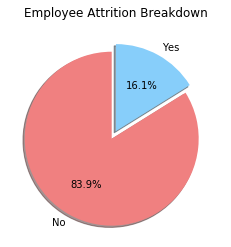

In [20]:
# Data to plot
labels = df_imputed['Attrition'].value_counts().keys().tolist()
values = df_imputed['Attrition'].value_counts().values.tolist()
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(values, explode=explode, labels=labels, colors=colors,autopct='%.1f%%', shadow=True, startangle=90)
plt.title('Employee Attrition Breakdown')
plt.show()

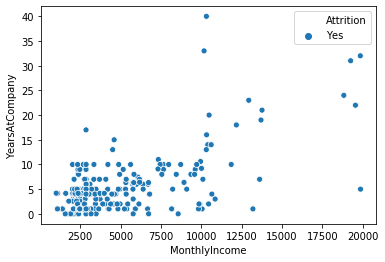

In [21]:
# separate into churn and non-churn employee sub-dataset:
churn = df_imputed[df_imputed['Attrition'] == 'Yes']
no_churn = df_imputed[df_imputed['Attrition'] == 'No']
sns.scatterplot(x='MonthlyIncome', y='YearsAtCompany', hue='Attrition', data=churn)

The pie chart above indicates that this employee attrition dataset is imbalanced with 84% is no churn and 16% is churn.

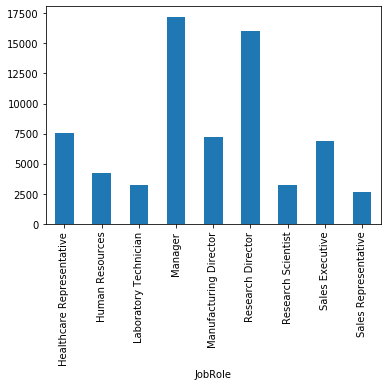

In [22]:
df_imputed.groupby("JobRole")['MonthlyIncome'].mean().plot.bar()

Text(-0.2, 122, '0.08')

Text(0.8, 121, '0.08')

Text(0.2, 256, '0.17')

Text(1.2, 982, '0.67')

Text(0.5, 1.0, 'Attrition vs. OverTime')

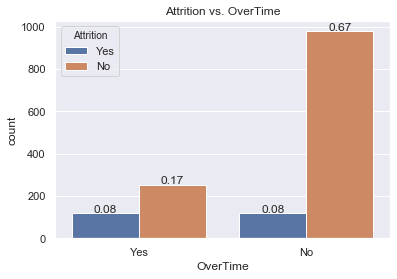

In [23]:
sns.set(style="darkgrid")
ax = sns.countplot(x="OverTime", hue="Attrition", data=df_imputed)

total = len(df_imputed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Attrition vs. OverTime')
plt.show()

Comment on graph above: More attrition in employees who are working overtime than ones who are not working overtime.

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Attrition vs. Marital Status')

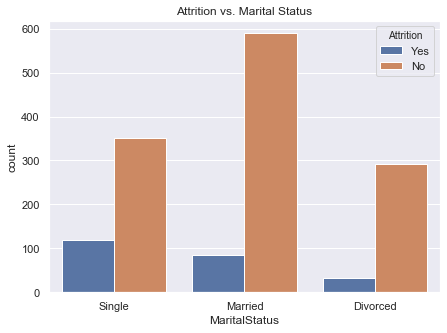

In [24]:
plt.figure(figsize=(7,5))
plt.title('Attrition vs. Marital Status')
sns.countplot(x = "MaritalStatus", hue = "Attrition", data = df_imputed)

Comment on graph abovee: More attrition in employees with single status.

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Attrition across Job Levels')

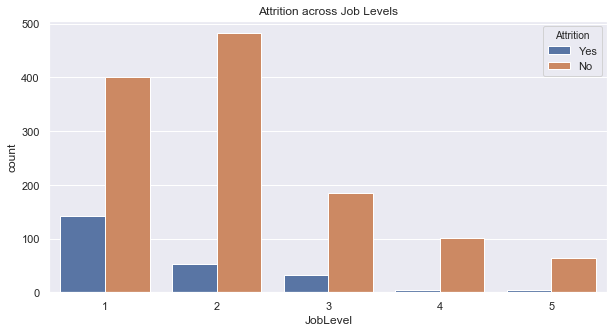

In [25]:
plt.figure(figsize=(10,5))
plt.title('Attrition across Job Levels')
sns.countplot(x = "JobLevel", hue = "Attrition", data = df_imputed)

Comment on graph above: We have higher employee attrition in lower job level

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Attrition Across Departments')

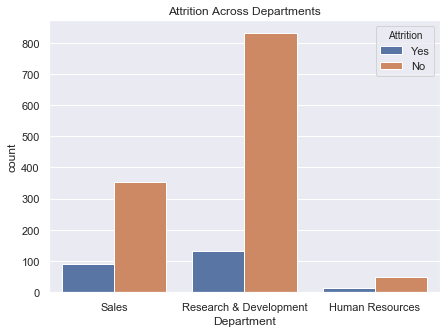

In [26]:
plt.figure(figsize=(7,5))
plt.title('Attrition Across Departments')
sns.countplot(x="Department", hue="Attrition", data=df_imputed)

Comment on graph above: Research & Development Department has the highest employee attrition

([<matplotlib.patches.Wedge at 0x2602b5e9908>,
 [Text(-0.7546122011874489, 0.8003501894914709, 'Travel_Rarely'),
  Text(0.4828658114780159, -0.9883524715938528, 'Travel_Frequently'),
  Text(1.0503677232433908, -0.3266919741415387, 'Non-Travel')],
 [Text(-0.41160665519315387, 0.4365546488135295, '74.1%'),
  Text(0.2633813517152814, -0.5391013481421014, '16.3%'),
  Text(0.5729278490418495, -0.1781956222590211, '9.6%')])

Text(0.5, 1.0, 'BusinessTravel Breakdown')

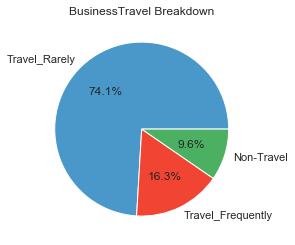

In [27]:
travelgroup = df_imputed['BusinessTravel'].value_counts().keys().tolist()
group_value = df_imputed['BusinessTravel'].value_counts().values.tolist()
 
# Create colors
a, b, c = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
plt.pie(group_value, autopct='%.1f%%', labels= travelgroup, colors=[a(0.6), b(0.6), c(0.6)] )
 
# show it
plt.title('BusinessTravel Breakdown')
plt.show()

(-0.05, 1.05, -0.05, 1.05)

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

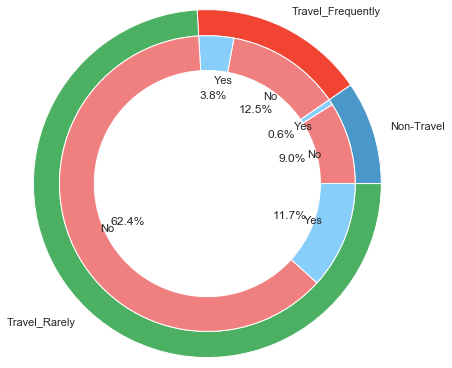

In [28]:
travelgroup = df_imputed['BusinessTravel'].value_counts(ascending= True).keys().tolist()
group_value = df_imputed['BusinessTravel'].value_counts(ascending= True).values.tolist()
travel_churn = ['No','Yes','No','Yes','No','Yes']
travel_churn_value = df_imputed.groupby(['BusinessTravel','Attrition'])['Attrition'].count().tolist()
 
# Create colors
a, b, c = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_value, radius=2, labels= travelgroup, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ , junk = ax.pie(travel_churn_value, autopct='%.1f%%', radius=2-0.3, labels=travel_churn, labeldistance=0.7, colors=['lightcoral', 'lightskyblue'])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

In [29]:
df_imputed['Attrition'].value_counts()

No     1232
Yes     237
Name: Attrition, dtype: int64

### Pre-Processing

In [30]:
df_new = df_imputed
# Convert Attrition, Gender, OverTime into label 0 and 1

df_new['Attrition'] = df_new['Attrition'].map({'No':0, 'Yes':1}).astype(int)
df_new['Gender'] = df_new['Gender'].map({'Female':0, 'Male':1}).astype(int)
df_new['OverTime'] = df_new['OverTime'].map({'No':0, 'Yes':1}).astype(int)

c:\users\anh le\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\anh le\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\anh le\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [31]:
# convert BusinessTravel, Department, EducationField, JobRole, MaritalStatus into one-hot vectors

#Business Travel
v_travel = pd.get_dummies(df_new['BusinessTravel'],columns='BusinessTravel',prefix='BusinessTravel')
df_new = pd.concat([df_new, v_travel], axis=1)
df_new.drop(['BusinessTravel'],axis=1,inplace= True)

# Dept
v_dept = pd.get_dummies(df_new['Department'],columns='Department',prefix='Department')
df_new = pd.concat([df_new, v_dept], axis=1)
df_new.drop(['Department'],axis=1,inplace= True)

# EducationField
v_edufield = pd.get_dummies(df_new['EducationField'],columns='EducationField',prefix='EducationField')
df_new = pd.concat([df_new, v_edufield], axis=1)
df_new.drop(['EducationField'],axis=1,inplace= True)

# JobRole
v_jobrole = pd.get_dummies(df_new['JobRole'],columns='JobRole',prefix='JobRole')
df_new = pd.concat([df_new, v_jobrole], axis=1)
df_new.drop(['JobRole'],axis=1,inplace= True)

# MaritalStatus
v_maritalstatus = pd.get_dummies(df_new['MaritalStatus'],columns='MaritalStatus',prefix='MaritalStatus')
df_new = pd.concat([df_new, v_maritalstatus], axis=1)
df_new.drop(['MaritalStatus'],axis=1,inplace= True)

In [32]:
df_new.shape
y = df_new['Attrition'].values
X = df_new.drop(['Attrition'],axis=1)
y.shape
X.shape

(1469, 52)

(1469,)

(1469, 51)

## Machine Learning Models

In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score

In [36]:
# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

# Scale the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Part 1: run models on original datasets

### 1. Dummy Classifier
gives you a measure of "baseline" performance, which is the success rate that one person should expect to achieve even if simply guessing

In [37]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.4f}".format(dummy_majority.score(X_test, y_test)))

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Unique predicted labels: [0]
Test score: 0.8397


Because the target variable (y) in this dataset has 2 classification values and this dataset is imbalanced, we use roc_auc score instead of micro recall score.

### 2. KNN Classifier

In [38]:
# KNN with GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid1 = {'n_neighbors':[1, 2, 3, 5, 10]}

grid1 = GridSearchCV(KNeighborsClassifier(), param_grid1, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc')
grid1.fit(X_train, y_train)
print('Best n_neightbor: ', grid1.best_params_)
print('validation score: ', grid1.best_score_)
print(grid1.scorer_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

Best n_neightbor:  {'n_neighbors': 10}
validation score:  0.6986981702199093
make_scorer(roc_auc_score, needs_threshold=True)


In [40]:
# performance scores of KNN model with the best parameter:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('train score', knn.score(X_train, y_train))

confusion = confusion_matrix(y_test, knn_pred)
print("Confusion matrix:\n{}".format(confusion))
print('test score {:.4f}'.format(knn.score(X_test, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test,knn_pred)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

train score 0.8646684831970936
Confusion matrix:
[[308   1]
 [ 55   4]]
test score 0.8478
roc_auc score: 0.5323


### 3. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

param_grid2 = {'C':[0.001, 0.01, 0.1, 1, 10, 20]}

grid2 = GridSearchCV(LogisticRegression(multi_class = 'auto', solver = 'lbfgs', max_iter = 10000), 
                    param_grid2, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc')
grid2.fit(X_train, y_train)
print(grid2.best_params_)
print(grid2.best_score_)
print(grid2.scorer_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'C': 1}
0.8454276947755208
make_scorer(roc_auc_score, needs_threshold=True)


In [43]:
# Logistic Regression model with the best parameter:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression( C = 1, solver = 'lbfgs', multi_class = 'auto',max_iter = 10000) 
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('train score', logreg.score(X_train, y_train))

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))
print('test score {:.4f}'.format(knn.score(X_test, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pred_logreg)))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

train score 0.8973660308810173
Confusion matrix:
[[301   8]
 [ 44  15]]
test score 0.8478
roc_auc score: 0.6142


### 4. LinearSVC

In [44]:
from sklearn.svm import LinearSVC

param_grid3_l1 = {'C':[0.001, 0.01, 0.1, 1, 10],
                 "penalty" : ['l1','l2']}

grid3 = GridSearchCV( LinearSVC(random_state = 0, dual = False, max_iter = 10000), 
                    param_grid3_l1, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc' )
grid3.fit(X_train, y_train)
print(grid3.best_params_)
print(grid3.best_score_)
print(grid3.scorer_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=10000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'C': 0.1, 'penalty': 'l2'}
0.8439367317628188
make_scorer(roc_auc_score, needs_threshold=True)


In [45]:
# Linear SVC with the best parameter:
from sklearn.svm import LinearSVC

clf= LinearSVC(C = 0.1, random_state = 0, penalty = 'l2', dual = False, max_iter = 10000)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

confusion = confusion_matrix(y_test, clf_pred)
print("Confusion matrix:\n{}".format(confusion))
print('accurary train score: {:.4f}'.format(clf.score(X_train,y_train)))
print('accurary test score: {:.4f}'.format(clf.score(X_test,y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, clf_pred)))

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

Confusion matrix:
[[307   2]
 [ 46  13]]
accurary train score: 0.8983
accurary test score: 0.8696
roc_auc score: 0.6069


### 5. Kerenilzed Support Vector Machine
5a. SVC - Kernel Linear

In [46]:
from sklearn.svm import SVC

param_grid4_linear = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid4_linear = GridSearchCV( SVC(kernel="linear"), 
                    param_grid4_linear, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc' )
grid4_linear.fit(X_train, y_train)
print(grid4_linear.best_params_)
print(grid4_linear.best_score_)
print(grid4_linear.scorer_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'C': 1}
0.8423890660847183
make_scorer(roc_auc_score, needs_threshold=True)


In [47]:
# SVC kernel linear with the best parameter:

svc_linear = SVC(kernel='linear', C = 1, random_state = 0)
svc_linear.fit(X_train, y_train)
pred_svc_linear = svc_linear.predict(X_test)

confusion = confusion_matrix(y_test, pred_svc_linear)
print("Confusion matrix:\n{}".format(confusion))
print('accurary train score: {:.4f}'.format(svc_linear.score(X_train,y_train)))
print('accuracy test score: {:.4f}'.format(svc_linear.score(X_test,y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pred_svc_linear)))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Confusion matrix:
[[304   5]
 [ 41  18]]
accurary train score: 0.9001
accuracy test score: 0.8750
roc_auc score: 0.6445


5b. SVC - Kernel RBF

In [48]:
from sklearn.svm import SVC

param_grid4_rbf = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}
grid4_rbf = GridSearchCV( SVC(kernel='rbf'), 
                    param_grid4_rbf, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc' )
grid4_rbf.fit(X_train, y_train)
print(grid4_rbf.best_params_)
print(grid4_rbf.best_score_)
print(grid4_rbf.scorer_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'C': 10, 'gamma': 0.01}
0.8411018782757914
make_scorer(roc_auc_score, needs_threshold=True)


In [49]:
# SVC kernel RBF with the best paramater:

svc_rbf = SVC(kernel='rbf', C = 10, gamma=0.01, random_state = 0)
svc_rbf.fit(X_train, y_train)
pred_svc_rbf = svc_rbf.predict(X_test)

confusion = confusion_matrix(y_test, pred_svc_rbf)
print("Confusion matrix:\n{}".format(confusion))
print('accurary train score: {:.4f}'.format(svc_rbf.score(X_train,y_train)))
print('accuracy test score: {:.4f}'.format(svc_rbf.score(X_test,y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pred_svc_rbf)))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Confusion matrix:
[[309   0]
 [ 49  10]]
accurary train score: 0.8892
accuracy test score: 0.8668
roc_auc score: 0.5847


5c. SVC - Kernel poly

In [51]:
param_grid4_poly = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1, 10],
              "degree": [1,2,3]}
grid4_poly = GridSearchCV( SVC(kernel='poly'), 
                    param_grid4_poly, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc' )
grid4_poly.fit(X_train, y_train)
print(grid4_poly.best_params_)
print(grid4_poly.best_score_)
print(grid4_poly.scorer_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [1, 2, 3],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'C': 0.1, 'degree': 1, 'gamma': 10}
0.8423890660847183
make_scorer(roc_auc_score, needs_threshold=True)


In [52]:
# SVC kernel poly with the best parameter:

svc_poly = SVC(kernel = 'poly', C = 0.1, degree = 1, gamma = 10, random_state = 0)
svc_poly.fit(X_train, y_train)
pred_svc_poly = svc_poly.predict(X_test)

confusion = confusion_matrix(y_test, pred_svc_poly)
print("Confusion matrix:\n{}".format(confusion))
print('accurary train score: {:.4f}'.format(svc_poly.score(X_train,y_train)))
print('accuracy test score: {:.4f}'.format(svc_poly.score(X_test,y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pred_svc_poly)))

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Confusion matrix:
[[304   5]
 [ 41  18]]
accurary train score: 0.9001
accuracy test score: 0.8750
roc_auc score: 0.6445


### 6. Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

param_grid5 = {'max_depth': [1, 2, 3, 5, 7, 10]}
grid5 = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid5, cv = 5, 
                     return_train_score= True, iid = False, scoring= 'roc_auc')
grid5.fit(X_train, y_train)
print(grid5.best_params_)
print(grid5.best_score_)
print(grid5.scorer_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
     

{'max_depth': 5}
0.6775629045194262
make_scorer(roc_auc_score, needs_threshold=True)


In [54]:
# Decision Tree model with the best parameter:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=5,random_state=0)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

confusion = confusion_matrix(y_test, dtree_pred)
print("Confusion matrix:\n{}".format(confusion))
print('accurary train score: {:.4f}'.format(dtree.score(X_train,y_train)))
print('accuracy test score: {:.4f}'.format(dtree.score(X_test,y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, dtree_pred)))

# Feature Importance:
importance = dtree.feature_importances_
indices = np.argsort(importance)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(0,3): #X.shape[1]
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Confusion matrix:
[[304   5]
 [ 47  12]]
accurary train score: 0.9001
accuracy test score: 0.8587
roc_auc score: 0.5936
Feature ranking:
1. feature 10 (0.162278)
2. feature 8 (0.161142)
3. feature 6 (0.126775)


In [55]:
for f in range(0,3): #X.shape[1]
    print("feature", X.columns[indices[f]], importance[indices[f]])

feature TotalWorkingYears 0.16227792115423578
feature OverTime 0.16114248620337732
feature MonthlyIncome 0.1267745882822434


# Summary of Model's Performance Scores 

In [57]:
def model_report(model, grid, training_x,testing_x,training_y,testing_y, name) :
    bestparams  = grid.best_params_ 
    model.fit(training_x,training_y)
    prediction  = model.predict(testing_x)
    accuracytrain  = model.score(training_x,training_y)
    accuracytest = model.score(testing_x,testing_y)
    roc_auc     = roc_auc_score(testing_y,prediction)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Best Parameter"  : [bestparams],
                       "Train Accuracy score"  : [accuracytrain],
                       "Test Accuracy score"  : [accuracytest],
                       "ROC_AUC score": [roc_auc],
                      })
    return df

In [58]:
model1 = model_report(knn,grid1,X_train, X_test, y_train, y_test, "KNN Classifier")
model2 = model_report(logreg,grid2,X_train, X_test, y_train, y_test, "Logistic Regression")
model3 = model_report(clf, grid3, X_train, X_test, y_train, y_test, "LinearSVC")
model4 = model_report(svc_linear, grid4_linear, X_train, X_test, y_train, y_test, "SVC-kernel linear")
model5 = model_report(svc_rbf, grid4_rbf, X_train, X_test, y_train, y_test, "SVC-kernel RBF")
model6 = model_report(svc_poly, grid4_poly, X_train, X_test, y_train, y_test, "SVC-kernel poly")
model7 = model_report(dtree, grid5, X_train, X_test, y_train, y_test, "DecisionTree Classifier")

model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)
model_performances

Model                        Best Parameter  \
0           KNN Classifier                   {'n_neighbors': 10}   
1      Logistic Regression                              {'C': 1}   
2                LinearSVC           {'C': 0.1, 'penalty': 'l2'}   
3        SVC-kernel linear                              {'C': 1}   
4           SVC-kernel RBF              {'C': 10, 'gamma': 0.01}   
5          SVC-kernel poly  {'C': 0.1, 'degree': 1, 'gamma': 10}   
6  DecisionTree Classifier                      {'max_depth': 5}   

   Train Accuracy score  Test Accuracy score  ROC_AUC score  
0              0.864668             0.847826       0.532280  
1              0.897366             0.858696       0.614174  
2              0.898274             0.869565       0.606933  
3              0.900091             0.875000       0.644452  
4              0.889192             0.866848       0.584746  
5              0.900091             0.875000       0.644452  
6              0.900091             0.858696       0.593604

Because the dataset is imbalanced, we choose roc_auc_score as the score to valuate models we have done. Based on the summary table above, among all the models, both SVC-kernel linear (with C=1) and SVC-kernel poly (with C=1, degree=1, gamma=10) have the highest roc_auc score. In this case, we choose SVC-kernel linear as the best model for this dataset.

### Part 2: Now, I want to see if Ensemble methods can help improve the evaluation score (roc_auc score)

In [150]:
# Split Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

# Scale Datasets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [151]:
df_new['Attrition'].value_counts()

0    1232
1     237
Name: Attrition, dtype: int64

## 1. Voting Classifier

### 1.a Hard Voting

In [59]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [60]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

logreg = LogisticRegression( C = 1, solver = 'lbfgs', max_iter = 10000) 
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

svc_linear = SVC(kernel='linear', C = 1, random_state = 0)
svc_linear.fit(X_train, y_train)
pred_svc_linear = svc_linear.predict(X_test)

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('logreg', logreg), 
                                          ('KNN', knn), ('SVC linear', svc_linear)], voting='hard') 
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (logreg, knn, svc_linear, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'hard voting roc_auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                            

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression hard voting roc_auc score: 0.6142


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier hard voting roc_auc score: 0.5323


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

SVC hard voting roc_auc score: 0.6445


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                            

VotingClassifier hard voting roc_auc score: 0.6190


In [264]:
df_new.columns.values[0:2]
X.shape

array(['Age', 'DailyRate'], dtype=object)

(1101, 2)

### 1.b Soft Voting

In [61]:
dtree = DecisionTreeClassifier(max_depth=2,random_state=0)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

from sklearn.ensemble import VotingClassifier
voting_clf2 = VotingClassifier(estimators=[('logreg', logreg), 
                                          ('KNN', knn), ('decision tree', dtree)], voting='soft') 
voting_clf2.fit(X_train, y_train)

for clf in (logreg, knn, dtree, voting_clf2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'soft voting roc_auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred,)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowsk...
                             ('decision tree

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression soft voting roc_auc score: 0.6142


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier soft voting roc_auc score: 0.5323


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

DecisionTreeClassifier soft voting roc_auc score: 0.5238


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowsk...
                             ('decision tree

VotingClassifier soft voting roc_auc score: 0.5424


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowsk...
                             ('DecisionTree'

Text(0.5, 1.0, 'LogReg')

Text(0.5, 1.0, 'KNN (k=10)')

Text(0.5, 1.0, 'DTree')

Text(0.5, 1.0, 'Soft Voting')

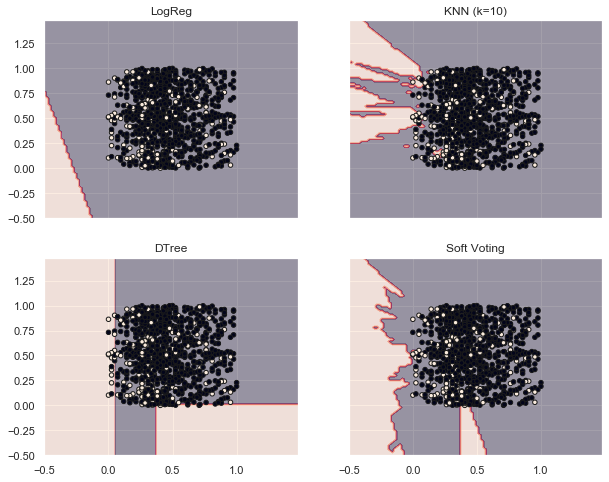

In [62]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

X = X_train[:, [0, 1]]
y = y_train

# Training classifiers
clf1 = LogisticRegression( C = 1, solver = 'lbfgs', max_iter = 10000)
clf2 = KNeighborsClassifier(n_neighbors=10)
clf3 = DecisionTreeClassifier(max_depth=2,random_state=0)
eclf = VotingClassifier(estimators=[('logreg', clf1), ('knn', clf2),
                                    ('DecisionTree', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['LogReg', 'KNN (k=10)',
                         'DTree', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 2. Bagging

### 2.a Bagging with Logistic Regression

In [64]:
from sklearn.ensemble import BaggingClassifier

bag_clf5 = BaggingClassifier(logreg, n_estimators=100, max_samples=500, bootstrap=False, random_state=0)

bag_clf5.fit(X_train, y_train)
y_pred = bag_clf5.predict(X_test)

print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

BaggingClassifier(base_estimator=LogisticRegression(C=1, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=10000,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=500, n_estimators=100, n_jobs=None,

roc_auc score: 0.5968


### 2.a Bagging with DecisionTree Classifier

In [65]:
dtree = DecisionTreeClassifier(max_depth=2,random_state=0)
bag_clf2 = BaggingClassifier(dtree, n_estimators=100, max_samples=500, bootstrap=True, random_state=0, oob_score=True)

bag_clf2.fit(X_train, y_train)
y_pred = bag_clf2.predict(X_test)
print('oob score: {:.4f}'.format(bag_clf2.oob_score_)) 
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=2,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
          

oob score: 0.8474
roc_auc score: 0.5069


### 2.c Random Forest Classifier (special case of Bagging)

In [66]:
rnd = RandomForestClassifier(max_depth=2, max_leaf_nodes=20, n_estimators=100, random_state=0)
rnd.fit(X_train, y_train)
pred_rnd = rnd.predict(X_test)
pred_rnd_proba = rnd.predict_proba(X_test)[:,1]

print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pred_rnd)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

roc_auc score: 0.5000


## 3. Pasting
Pasting is Bagging without bootstrapping method

### 3.a Pasting with SVC - kernel linear

In [67]:
svc_linear = SVC(kernel='linear', C = 1, random_state = 0)
bag_clf3 = BaggingClassifier(svc_linear, n_estimators=100, max_samples=500, bootstrap=False, random_state=0)

bag_clf3.fit(X_train, y_train)
y_pred = bag_clf3.predict(X_test)

print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

BaggingClassifier(base_estimator=SVC(C=1, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='linear', max_iter=-1,
                                     probability=False, random_state=0,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=500, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

roc_auc score: 0.6275


### 3.b Pasting with Decision Tree

In [68]:
from sklearn.ensemble import BaggingClassifier

dtree = DecisionTreeClassifier(max_depth=2,random_state=0)
bag_clf4 = BaggingClassifier(dtree, n_estimators=100, max_samples=500, bootstrap=False, random_state=0)

bag_clf4.fit(X_train, y_train)
y_pred = bag_clf4.predict(X_test)

print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=2,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
          

roc_auc score: 0.5153


## 4. AdaBoost 

### 4.a AdaBoost with Decision Tree

In [69]:
from sklearn.ensemble import AdaBoostClassifier

ada1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators= 100, algorithm="SAMME.R", 
                          learning_rate= 0.05, random_state=0)
ada1.fit(X_train, y_train)
y_pred = ada1.predict(X_test)

print("Accuracy on test set: {:.4f}".format(ada1.score(X_test, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

Accuracy on test set: 0.8696
roc_auc score: 0.6001


Using Adaptive Boosting on DecisionTreeClassifier slightly boosts the recall score from 0.5936 to 0.6001

### 4.b AdaBoost with Logistic Regression

In [70]:
ada2 = AdaBoostClassifier(LogisticRegression(C = 1, solver = 'lbfgs', max_iter = 10000), n_estimators=100, algorithm='SAMME', 
                          learning_rate=0.05, random_state=0)
ada2.fit(X_train, y_train)
y_pred = ada2.predict(X_test)

print("Accuracy on test set: {:.4f}".format(ada2.score(X_test, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LogisticRegression(C=1, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=10000,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.05, n_estimators=100, random_state=0)

Accuracy on test set: 0.8696
roc_auc score: 0.6138


Using Adaptive Boosting on Logistic Regression slightly reduce the recall score from 0.6142 to 0.6138

## 5. Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=2, n_estimators=200, learning_rate= 0.5)
gbrt.fit(X_train, y_train)

y_pred = gbrt.predict(X_test)
print("Accuracy on test set: {:.4f}".format(gbrt.score(X_test, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy on test set: 0.8533
roc_auc score: 0.6384


In [220]:
df_new.columns.values

array(['Age', 'DailyRate', 'HourlyRate', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'MonthlyIncome',
       'MonthlyRate', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsAtCompany', 'Attrition', 'DistanceFromHome',
       'EmployeeNumber', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Hea

<Figure size 1296x864 with 0 Axes>

<BarContainer object of 51 artists>

([<matplotlib.axis.YTick at 0x2602d0a5148>,
 <a list of 51 Text yticklabel objects>)

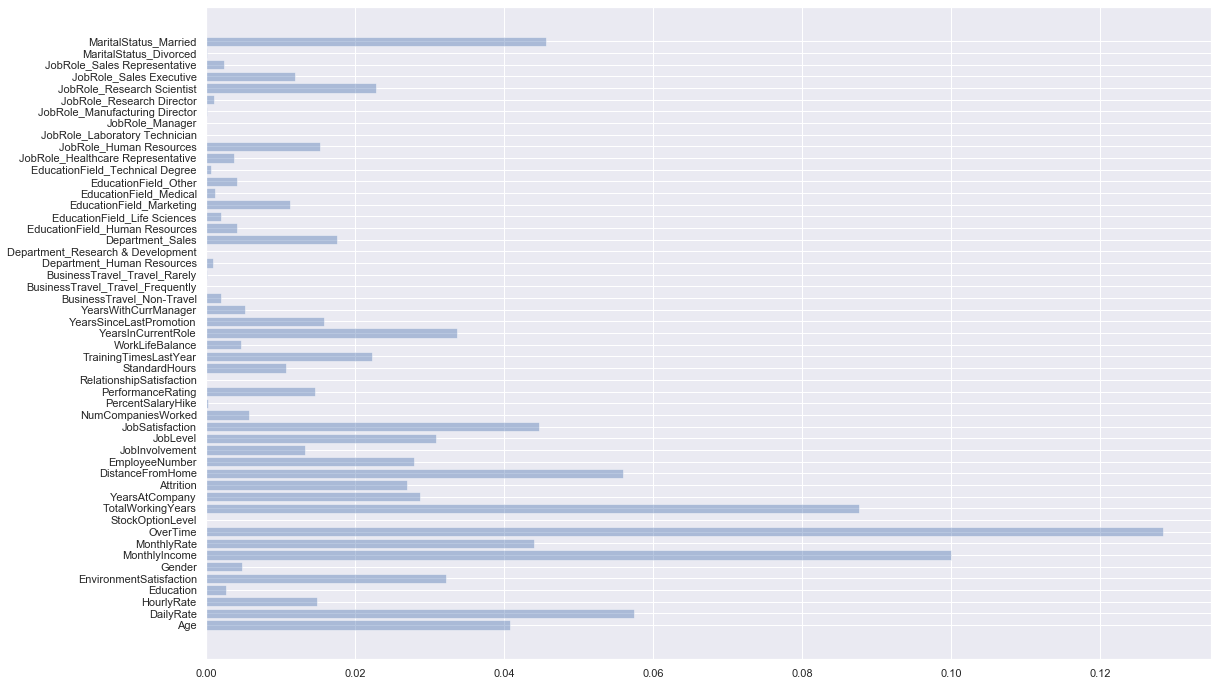

In [73]:
%matplotlib inline 

y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = df_new.columns.values

plt.figure(figsize=(18,12))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

### Part 3: Now, I want to see if dimension reduction can help improve the performance of models

## Principal Component Analysis (PCA)

In [74]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
d
pca.n_components_
np.sum(pca.explained_variance_ratio_)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

31

31

0.9525334716542164

Number of components needed to retain 95% of the variance in the original data is 31

In [75]:
pca = PCA(n_components = 31)
X_train31 = pca.fit_transform(X_train)
X_test31 = pca.transform(X_test)

### 1. KNN Classifier

In [76]:
# KNN with GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

pca_param_grid1 = {'n_neighbors':[1, 2, 3, 5, 10]}

pca_grid1 = GridSearchCV(KNeighborsClassifier(), pca_param_grid1, cv = 5, iid = False, scoring = 'roc_auc')
pca_grid1.fit(X_train31, y_train)
print('Best n_neightbor: ', pca_grid1.best_params_)
print('validation score: ', pca_grid1.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Best n_neightbor:  {'n_neighbors': 10}
validation score:  0.7054389793520228


In [77]:
from sklearn.neighbors import KNeighborsClassifier

pca_knn = KNeighborsClassifier(10)
pca_knn.fit(X_train31, y_train)
pca_knn_pred = pca_knn.predict(X_test31)

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pca_knn_pred)))
print('test score {:.4f}'.format(pca_knn.score(X_test31, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pca_knn_pred)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Confusion matrix:
[[309   0]
 [ 55   4]]
test score 0.8505
roc_auc score: 0.5339


<Figure size 360x360 with 0 Axes>

(array([0., 0., 1.]),
 array([0.        , 0.06779661, 1.        ]),
 array([2, 1, 0]),
 0.5338983050847458)

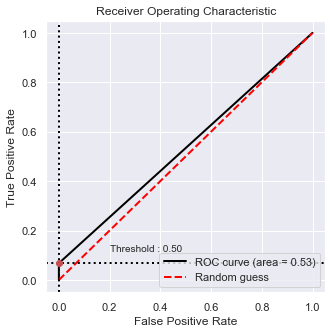

In [78]:
%matplotlib inline 
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test, pca_knn_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

<Figure size 360x360 with 0 Axes>

(array([0.        , 0.        , 0.        , 0.01294498, 0.04854369,
        0.11650485, 0.33980583, 0.64724919, 1.        ]),
 array([0.        , 0.01694915, 0.06779661, 0.10169492, 0.18644068,
        0.37288136, 0.59322034, 0.81355932, 1.        ]),
 array([1.8, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]),
 0.6692172672919753)

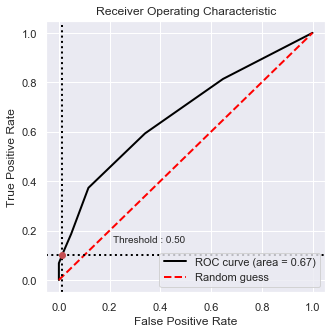

In [79]:
%matplotlib inline 
from plot_metric.functions import BinaryClassification
pca_knn_pred_proba = pca_knn.predict_proba(X_test31)[:,1]
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pca_knn_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

Based 2 graphs above, using predicted values generated by predict_proba() function returns better ROC curve. Therefore, instead of using predict() function, from now on, I will use predict_proba() or decision_function() to calculate predicted values for the ROC curve.

### 2. Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

pca_param_grid2 = {'C':[0.001, 0.01, 0.1, 1, 10, 20]}

pca_grid2 = GridSearchCV(LogisticRegression(solver = 'lbfgs', max_iter = 10000), 
                    pca_param_grid2, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc')
pca_grid2.fit(X_train31, y_train)
print(pca_grid2.best_params_)
print(pca_grid2.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'C': 1}
0.8223369332064984


In [81]:
pca_logreg = LogisticRegression( C = 1, solver = 'lbfgs', max_iter = 10000) 
pca_logreg.fit(X_train31, y_train)
pca_pred_logreg = pca_logreg.predict(X_test31)

confusion = confusion_matrix(y_test, pca_pred_logreg)
print("Confusion matrix:\n{}".format(confusion))
print('test score {:.4f}'.format(pca_logreg.score(X_test31, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pca_pred_logreg)))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion matrix:
[[303   6]
 [ 46  13]]
test score 0.8587
roc_auc score: 0.6005


<Figure size 360x360 with 0 Axes>

(array([0.        , 0.        , 0.        , 0.00323625, 0.00323625,
        0.00647249, 0.00647249, 0.01294498, 0.01294498, 0.02265372,
        0.02265372, 0.02588997, 0.02588997, 0.02912621, 0.02912621,
        0.0420712 , 0.0420712 , 0.04530744, 0.04530744, 0.04854369,
        0.04854369, 0.05177994, 0.05177994, 0.0776699 , 0.0776699 ,
        0.08090615, 0.08090615, 0.08737864, 0.08737864, 0.09385113,
        0.09385113, 0.10355987, 0.10355987, 0.12297735, 0.12297735,
        0.15210356, 0.15210356, 0.15533981, 0.15533981, 0.1618123 ,
        0.1618123 , 0.17475728, 0.17475728, 0.18122977, 0.18122977,
        0.19093851, 0.19093851, 0.20064725, 0.20064725, 0.21035599,
        0.21035599, 0.23300971, 0.23300971, 0.23624595, 0.23624595,
        0.28802589, 0.28802589, 0.33333333, 0.33333333, 0.36245955,
        0.36245955, 0.4433657 , 0.4433657 , 0.45307443, 0.45307443,
        0.48220065, 0.48220065, 0.52750809, 0.52750809, 0.57928803,
        0.57928803, 0.66019417, 0.66019417, 0.68

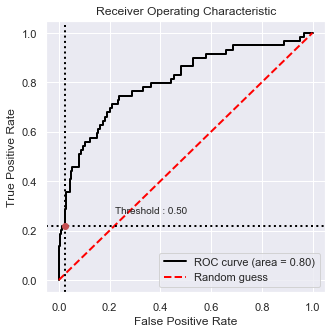

In [82]:
%matplotlib inline 
pca_logreg_proba = pca_logreg.predict_proba(X_test31)[:,1]

bc = BinaryClassification(y_test, pca_logreg_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### 3. LinearSVC

In [84]:
from sklearn.svm import LinearSVC

pca_param_grid3 = {'C':[0.001, 0.01, 0.1, 1, 10],
                 "penalty" : ['l1','l2']}

pca_grid3 = GridSearchCV( LinearSVC(random_state = 0, dual = False, max_iter = 10000), 
                    pca_param_grid3, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc' )
pca_grid3.fit(X_train31, y_train)
print(pca_grid3.best_params_)
print(pca_grid3.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=10000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'C': 1, 'penalty': 'l2'}
0.8227781508216291


In [85]:
from sklearn.svm import LinearSVC

pca_clf= LinearSVC(C = 1, random_state = 0, penalty = 'l2', dual = False, max_iter = 10000)
pca_clf.fit(X_train31, y_train)
pca_clf_pred = pca_clf.predict(X_test31)

confusion = confusion_matrix(y_test, pca_clf_pred)
print("Confusion matrix:\n{}".format(confusion))
print('accurary test score: {:.4f}'.format(pca_clf.score(X_test31,y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pca_clf_pred)))

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

Confusion matrix:
[[306   3]
 [ 47  12]]
accurary test score: 0.8641
roc_auc score: 0.5968


<Figure size 360x360 with 0 Axes>

(array([0.        , 0.        , 0.        , 0.00323625, 0.00323625,
        0.00970874, 0.00970874, 0.01294498, 0.01294498, 0.02265372,
        0.02265372, 0.02912621, 0.02912621, 0.03236246, 0.03236246,
        0.03883495, 0.03883495, 0.05501618, 0.05501618, 0.06472492,
        0.06472492, 0.06796117, 0.06796117, 0.07443366, 0.07443366,
        0.08737864, 0.08737864, 0.09061489, 0.09061489, 0.09708738,
        0.09708738, 0.12621359, 0.12621359, 0.1618123 , 0.1618123 ,
        0.17799353, 0.17799353, 0.18770227, 0.18770227, 0.19093851,
        0.19093851, 0.21035599, 0.21035599, 0.22006472, 0.22006472,
        0.22977346, 0.22977346, 0.2394822 , 0.2394822 , 0.25242718,
        0.25242718, 0.25889968, 0.25889968, 0.29449838, 0.29449838,
        0.37864078, 0.37864078, 0.40453074, 0.40453074, 0.40776699,
        0.40776699, 0.46601942, 0.46601942, 0.48220065, 0.48220065,
        0.50485437, 0.50485437, 0.53398058, 0.53398058, 0.55987055,
        0.55987055, 0.63754045, 0.63754045, 0.67

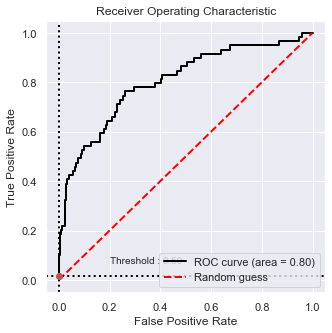

In [86]:
# Visualisation with plot_metric
pca_clf_predict_proba = pca_clf.decision_function(X_test31)
bc = BinaryClassification(y_test, pca_clf_predict_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## 4. Kernelized Support Vector Machine

### 4.a SVC - kernel Linear

In [87]:
pca_param_grid4_linear = {'C': [0.001, 0.01, 0.1, 1, 10]}

pca_grid4_linear = GridSearchCV( SVC(kernel="linear"), 
                    pca_param_grid4_linear, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc' )
pca_grid4_linear.fit(X_train31, y_train)

print(pca_grid4_linear.best_params_)
print(pca_grid4_linear.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'C': 0.001}
0.8158057747188181


In [97]:
pca_svc_linear = SVC(kernel='linear', C = 0.001, random_state = 0)
pca_svc_linear.fit(X_train31, y_train)
pca_pred_svc_linear = pca_svc_linear.predict(X_test31)

confusion = confusion_matrix(y_test, pca_pred_svc_linear)
print("Confusion matrix:\n{}".format(confusion))
print('accuracy test score: {:.4f}'.format(pca_svc_linear.score(X_test31, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pca_pred_svc_linear)))

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Confusion matrix:
[[309   0]
 [ 59   0]]
accuracy test score: 0.8397
roc_auc score: 0.5000


<Figure size 360x360 with 0 Axes>

(array([0.        , 0.        , 0.        , 0.00323625, 0.00323625,
        0.00647249, 0.00647249, 0.00970874, 0.00970874, 0.01294498,
        0.01294498, 0.01941748, 0.01941748, 0.02265372, 0.02265372,
        0.03559871, 0.03559871, 0.03883495, 0.03883495, 0.0420712 ,
        0.0420712 , 0.04530744, 0.04530744, 0.04854369, 0.04854369,
        0.05177994, 0.05177994, 0.05825243, 0.05825243, 0.09061489,
        0.09061489, 0.11003236, 0.11003236, 0.13915858, 0.13915858,
        0.14239482, 0.14239482, 0.14886731, 0.14886731, 0.16828479,
        0.16828479, 0.19093851, 0.19093851, 0.19417476, 0.19417476,
        0.22006472, 0.22006472, 0.24919094, 0.24919094, 0.25566343,
        0.25566343, 0.27508091, 0.27508091, 0.2815534 , 0.2815534 ,
        0.30420712, 0.30420712, 0.39158576, 0.39158576, 0.42071197,
        0.42071197, 0.49190939, 0.49190939, 0.54045307, 0.54045307,
        0.55987055, 0.55987055, 0.5631068 , 0.5631068 , 0.56957929,
        0.56957929, 0.62783172, 0.62783172, 0.70

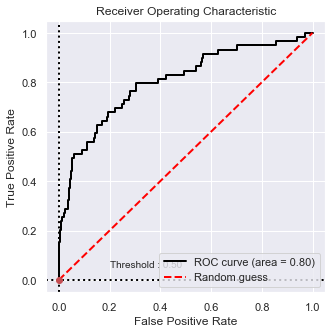

In [98]:
%matplotlib inline
pca_pred_svc_linear = pca_svc_linear.predict(X_test31)
bc = BinaryClassification(y_test, pca_svc_linear.decision_function(X_test31), labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### 4.b SVC - Kernel RBF

In [93]:
pca_param_grid4_rbf = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

pca_grid4_rbf = GridSearchCV( SVC(kernel='rbf'), 
                    pca_param_grid4_rbf, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc' )
pca_grid4_rbf.fit(X_train31, y_train)

print(pca_grid4_rbf.best_params_)
print(pca_grid4_rbf.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'C': 1, 'gamma': 0.1}
0.8195366795366796


In [99]:
# SVC kernel RBF with the best paramater:
pca_svc_rbf = SVC(kernel='rbf', C = 1, gamma= 0.1, random_state = 0)
pca_svc_rbf.fit(X_train31, y_train)
pca_pred_svc_rbf = pca_svc_rbf.predict(X_test31)

confusion = confusion_matrix(y_test, pca_pred_svc_rbf)
print("Confusion matrix:\n{}".format(confusion))
print('accuracy test score: {:.4f}'.format(pca_svc_rbf.score(X_test31, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pca_pred_svc_rbf)))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Confusion matrix:
[[309   0]
 [ 51   8]]
accuracy test score: 0.8614
roc_auc score: 0.5678


<Figure size 360x360 with 0 Axes>

(array([0.        , 0.        , 0.        , 0.00647249, 0.00647249,
        0.00970874, 0.00970874, 0.01618123, 0.01618123, 0.01941748,
        0.01941748, 0.02588997, 0.02588997, 0.02912621, 0.02912621,
        0.03559871, 0.03559871, 0.03883495, 0.03883495, 0.0420712 ,
        0.0420712 , 0.05177994, 0.05177994, 0.05501618, 0.05501618,
        0.06472492, 0.06472492, 0.07119741, 0.07119741, 0.08090615,
        0.08090615, 0.09061489, 0.09061489, 0.11326861, 0.11326861,
        0.15210356, 0.15210356, 0.16504854, 0.16504854, 0.16828479,
        0.16828479, 0.17152104, 0.17152104, 0.2038835 , 0.2038835 ,
        0.21035599, 0.21035599, 0.22330097, 0.22330097, 0.25242718,
        0.25242718, 0.27831715, 0.27831715, 0.36569579, 0.36569579,
        0.37540453, 0.37540453, 0.37864078, 0.37864078, 0.40453074,
        0.40453074, 0.40776699, 0.40776699, 0.4368932 , 0.4368932 ,
        0.46925566, 0.46925566, 0.47249191, 0.47249191, 0.53074434,
        0.53074434, 0.57605178, 0.57605178, 0.75

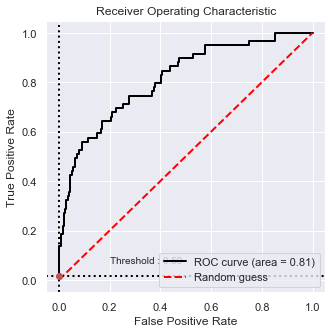

In [100]:
pca_pred_svc_rbf = pca_svc_rbf.predict(X_test31)
bc = BinaryClassification(y_test, pca_svc_rbf.decision_function(X_test31), labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### 4.c SVC- Kernel Poly

In [96]:
pca_param_grid4_poly = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1, 10],
              "degree": [1,2,3]}

pca_grid4_poly = GridSearchCV( SVC(kernel='poly', random_state=0), 
                    pca_param_grid4_poly, cv = 5, return_train_score= True, iid = False, scoring = 'roc_auc' )
pca_grid4_poly.fit(X_train31, y_train)
print(pca_grid4_poly.best_params_)
print(pca_grid4_poly.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [1, 2, 3],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

{'C': 0.001, 'degree': 1, 'gamma': 1}
0.8158057747188181


In [101]:
pca_svc_poly = SVC(kernel = 'poly', C = 0.001, degree = 1, gamma = 1, random_state = 0)
pca_svc_poly.fit(X_train31, y_train)
pca_pred_svc_poly = pca_svc_poly.predict(X_test31)

confusion = confusion_matrix(y_test, pca_pred_svc_poly)
print("Confusion matrix:\n{}".format(confusion))
print('accuracy test score: {:.4f}'.format(pca_svc_poly.score(X_test31, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pca_pred_svc_poly)))

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Confusion matrix:
[[309   0]
 [ 59   0]]
accuracy test score: 0.8397
roc_auc score: 0.5000


<Figure size 360x360 with 0 Axes>

(array([0.        , 0.        , 0.        , 0.00323625, 0.00323625,
        0.00647249, 0.00647249, 0.00970874, 0.00970874, 0.01294498,
        0.01294498, 0.01941748, 0.01941748, 0.02265372, 0.02265372,
        0.03559871, 0.03559871, 0.03883495, 0.03883495, 0.0420712 ,
        0.0420712 , 0.04530744, 0.04530744, 0.04854369, 0.04854369,
        0.05177994, 0.05177994, 0.05825243, 0.05825243, 0.09061489,
        0.09061489, 0.11003236, 0.11003236, 0.13915858, 0.13915858,
        0.14239482, 0.14239482, 0.14886731, 0.14886731, 0.16828479,
        0.16828479, 0.19093851, 0.19093851, 0.19417476, 0.19417476,
        0.22006472, 0.22006472, 0.24919094, 0.24919094, 0.25566343,
        0.25566343, 0.27508091, 0.27508091, 0.2815534 , 0.2815534 ,
        0.30420712, 0.30420712, 0.39158576, 0.39158576, 0.42071197,
        0.42071197, 0.49190939, 0.49190939, 0.54045307, 0.54045307,
        0.55987055, 0.55987055, 0.5631068 , 0.5631068 , 0.56957929,
        0.56957929, 0.62783172, 0.62783172, 0.70

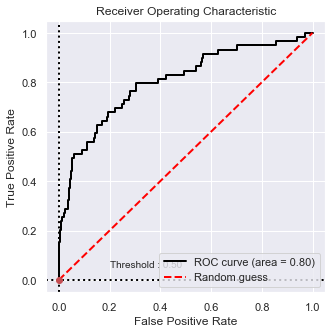

In [102]:
bc = BinaryClassification(y_test, pca_svc_poly.decision_function(X_test31), labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### 5. Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

pca_param_grid5 = {'max_depth': [1, 2, 3, 5, 7, 10]}
pca_grid5 = GridSearchCV(DecisionTreeClassifier(random_state = 0), pca_param_grid5, cv = 5, 
                         return_train_score= True, iid = False, scoring= 'roc_auc')
pca_grid5.fit(X_train31, y_train)

print(pca_grid5.best_params_)
print(pca_grid5.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
     

{'max_depth': 3}
0.6503243616287093


In [104]:
pca_dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
pca_dtree.fit(X_train31, y_train)
pca_dtree_pred = pca_dtree.predict(X_test31)

confusion = confusion_matrix(y_test, pca_dtree_pred)
print("Confusion matrix:\n{}".format(confusion))
print('accuracy test score: {:.4f}'.format(pca_dtree.score(X_test31, y_test)))
print('roc_auc score: {:.4f}'.format(roc_auc_score(y_test, pca_dtree_pred)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Confusion matrix:
[[300   9]
 [ 50   9]]
accuracy test score: 0.8397
roc_auc score: 0.5617


<Figure size 360x360 with 0 Axes>

(array([0.        , 0.00323625, 0.01941748, 0.02912621, 0.07443366,
        0.12944984, 0.19093851, 0.21682848, 1.        ]),
 array([0.        , 0.        , 0.11864407, 0.15254237, 0.28813559,
        0.3559322 , 0.44067797, 0.47457627, 1.        ]),
 array([1.81818182, 0.81818182, 0.76086957, 0.6875    , 0.37735849,
        0.30769231, 0.13483146, 0.11764706, 0.0858209 ]),
 0.6437386868520651)

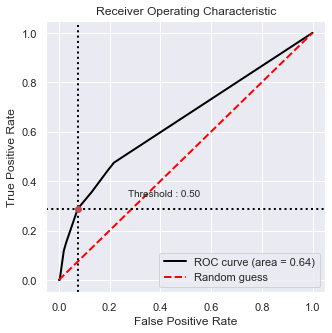

In [105]:
pca_dtree_predict_proba = pca_dtree.predict_proba(X_test31)[:,1]
bc = BinaryClassification(y_test, pca_dtree_predict_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Deep Learning Model

In [106]:
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report

#1- create model
model1 = Sequential()
#input layer
model1.add(Dense(12, activation = 'relu', input_dim = 51))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#2- compile: create computational graph
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
# Categorical_crossentropy specifies that we have multiple classes. 

#3- fit: training
model1.fit(X_train, y_train, epochs = 5, batch_size = 50) 

loss_and_metrics = model1.evaluate(X_test, y_test)
print('Test Loss {:.4f}'.format(loss_and_metrics[0]))
print('Test Accuracy {:.4f}'.format(loss_and_metrics[1]))

predicted_classes = model1.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

Using TensorFlow backend.


Epoch 1/5
1101/1101 [==============================] - 0s 332us/step - loss: 0.7268 - accuracy: 0.4886
Epoch 2/5
1101/1101 [==============================] - 0s 25us/step - loss: 0.5309 - accuracy: 0.8047
Epoch 3/5
1101/1101 [==============================] - 0s 25us/step - loss: 0.4645 - accuracy: 0.8365
Epoch 4/5
1101/1101 [==============================] - 0s 33us/step - loss: 0.4467 - accuracy: 0.8383
Epoch 5/5
1101/1101 [==============================] - 0s 27us/step - loss: 0.4378 - accuracy: 0.8383


368/368 [==============================] - 0s 79us/step
Test Loss 0.4404
Test Accuracy 0.8397

113712  classified correctly
21712  classified incorrectly


In [107]:
#1- create model
model2 = Sequential()
#input layer
model2.add(Dense(12, activation = 'relu', input_dim = 51))
# Add one hidden layer 
model2.add(Dense(12, activation='relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

#2- compile: create computational graph
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
# Categorical_crossentropy specifies that we have multiple classes. 

#3- fit: training
model2.fit(X_train, y_train, epochs = 5, batch_size = 25) 

loss_and_metrics = model2.evaluate(X_test, y_test)
print('Test Loss {:.4f}'.format(loss_and_metrics[0]))
print('Test Accuracy {:.4f}'.format(loss_and_metrics[1]))

predicted_classes = model2.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

Epoch 1/5
1101/1101 [==============================] - 0s 352us/step - loss: 0.5969 - accuracy: 0.7094
Epoch 2/5
1101/1101 [==============================] - 0s 57us/step - loss: 0.4411 - accuracy: 0.8383
Epoch 3/5
1101/1101 [==============================] - 0s 71us/step - loss: 0.4243 - accuracy: 0.8383
Epoch 4/5
1101/1101 [==============================] - 0s 65us/step - loss: 0.4074 - accuracy: 0.8383
Epoch 5/5
1101/1101 [==============================] - 0s 58us/step - loss: 0.3921 - accuracy: 0.8383


368/368 [==============================] - 0s 119us/step
Test Loss 0.3910
Test Accuracy 0.8397

113712  classified correctly
21712  classified incorrectly


## Summary of Models' Performance of Part 2

In [113]:
def model_report1(model, training_x,testing_x,training_y,testing_y, name) :
    model.fit(training_x,training_y)
    prediction  = model.predict(testing_x)
    accuracytest = model.score(testing_x, testing_y)
    roc_aucscore = roc_auc_score(testing_y, prediction)
    
    df1 = pd.DataFrame({"Model"           : [name],
                       "Test Accuracy score"  : [accuracytest],
                       "roc_auc score": [roc_aucscore],
                      }) 
    return df1

In [114]:
model1 = model_report1(voting_clf, X_train, X_test, y_train, y_test, "Hard Voting")
model2 = model_report1(voting_clf2, X_train, X_test, y_train, y_test, "Soft Voting")
model3 = model_report1(bag_clf5, X_train, X_test, y_train, y_test, "Bagging with Logistic Regression")
model4 = model_report1(bag_clf2, X_train, X_test, y_train, y_test, "Bagging with DecisionTree Classifier")
model5 = model_report1(bag_clf3, X_train, X_test, y_train, y_test, "Pasting with SVC-kernel Linear")
model6 = model_report1(bag_clf4, X_train, X_test, y_train, y_test, "Pasting with Decision Tree")
model7 = model_report1(ada1, X_train, X_test, y_train, y_test, "AdaBoost with Decision Tree")
model8 = model_report1(ada2, X_train, X_test, y_train, y_test, "AdaBoost with Logistic Regression")
model9 = model_report1(gbrt, X_train, X_test, y_train, y_test, "Gradient Boosting")

table1 = pd.concat([model1,model2,model3,model4,model5,model6,
                                model7,model8, model9],axis = 0).reset_index()
table1 = table1.drop(columns = "index", axis =1)
table1

Model  Test Accuracy score  roc_auc score
0                           Hard Voting             0.866848       0.619028
1                           Soft Voting             0.853261       0.542373
2      Bagging with Logistic Regression             0.864130       0.596841
3  Bagging with DecisionTree Classifier             0.839674       0.506856
4        Pasting with SVC-kernel Linear             0.869565       0.627503
5            Pasting with Decision Tree             0.842391       0.515331
6           AdaBoost with Decision Tree             0.869565       0.600077
7     AdaBoost with Logistic Regression             0.869565       0.613790
8                     Gradient Boosting             0.853261       0.638363

In [115]:
def model_report2(model, grid, training_x,testing_x,training_y,testing_y, name) :
    bestparams  = grid.best_params_ 
    model.fit(training_x,training_y)
    prediction  = model.predict(testing_x)
    accuracytest = model.score(testing_x,testing_y)
    roc_aucscore     = roc_auc_score(testing_y,prediction)
    
    df2 = pd.DataFrame({"Model"           : [name],
                       "Best Parameter"  : [bestparams],
                       "Test Accuracy score"  : [accuracytest],
                       "Roc_auc score"    : [roc_aucscore],
                      }) 
    return df2

In [116]:
pcamodel1 = model_report2(pca_knn, pca_grid1, X_train31, X_test31, y_train, y_test, "KNN Classifier")
pcamodel2 = model_report2(pca_logreg, pca_grid2, X_train31, X_test31, y_train, y_test, "Logistic Regression")
pcamodel3 = model_report2(pca_clf, pca_grid3, X_train31, X_test31, y_train, y_test, "LinearSVC")
pcamodel4 = model_report2(pca_svc_linear, pca_grid4_linear, X_train31, X_test31, y_train, y_test, "SVC-kernel Linear")
pcamodel5 = model_report2(pca_svc_rbf, pca_grid4_rbf, X_train31, X_test31, y_train, y_test, "SVC-kernel RBF")
pcamodel6 = model_report2(pca_svc_poly, pca_grid4_poly, X_train31, X_test31, y_train, y_test, "SVC-kernel Poly")
pcamodel7 = model_report2(pca_dtree, pca_grid5, X_train31, X_test31, y_train, y_test, "DecisionTree Classifier")

table2 = pd.concat([pcamodel1, pcamodel2, pcamodel3, pcamodel4, pcamodel5, pcamodel6, pcamodel7],axis = 0).reset_index()
table2 = table2.drop(columns = "index", axis =1)
table2

Model                         Best Parameter  \
0           KNN Classifier                    {'n_neighbors': 10}   
1      Logistic Regression                               {'C': 1}   
2                LinearSVC              {'C': 1, 'penalty': 'l2'}   
3        SVC-kernel Linear                           {'C': 0.001}   
4           SVC-kernel RBF                 {'C': 1, 'gamma': 0.1}   
5          SVC-kernel Poly  {'C': 0.001, 'degree': 1, 'gamma': 1}   
6  DecisionTree Classifier                       {'max_depth': 3}   

   Test Accuracy score  Roc_auc score  
0             0.850543       0.533898  
1             0.858696       0.600461  
2             0.864130       0.596841  
3             0.839674       0.500000  
4             0.861413       0.567797  
5             0.839674       0.500000  
6             0.839674       0.561708

In [117]:
combine_data = {'Model':['KNN Classifier','Logistic Regression','LinearSVC', 'SVC-kernel linear','SVC-kernel RBF','SVC-kernel poly','DecisionTree Classifier'],
       'Best Parameter_Base Model': ['n_neighbors: 10','C: 1','C: 1, penalty: l2', 'C: 1', 'C: 10, gamma: 0.01', 'C: 10, degree: 1, gamma: 10','max_depth: 2'],
        'Best Parameter_PCA': ['n_neighbors: 10','C: 1','C: 1, penalty: l2', 'C: 10', 'C:10, gamma: 0.01', 'C: 10, degree: 1, gamma: 1','max_depth:3'],
        'roc_auc score_Original dataset': [0.532280,0.614174,0.606933,0.644452, 0.584746, 0.644452,0.593604],
        'roc_auc score_Reduced dataset': [0.533898,0.600461,0.596841,0.500000,0.567797,0.500000,0.561708]
       }
Combine_Table = pd.DataFrame(combine_data)
Combine_Table

Model    Best Parameter_Base Model  \
0           KNN Classifier              n_neighbors: 10   
1      Logistic Regression                         C: 1   
2                LinearSVC            C: 1, penalty: l2   
3        SVC-kernel linear                         C: 1   
4           SVC-kernel RBF           C: 10, gamma: 0.01   
5          SVC-kernel poly  C: 10, degree: 1, gamma: 10   
6  DecisionTree Classifier                 max_depth: 2   

           Best Parameter_PCA  roc_auc score_Original dataset  \
0             n_neighbors: 10                        0.532280   
1                        C: 1                        0.614174   
2           C: 1, penalty: l2                        0.606933   
3                       C: 10                        0.644452   
4           C:10, gamma: 0.01                        0.584746   
5  C: 10, degree: 1, gamma: 1                        0.644452   
6                 max_depth:3                        0.593604   

   roc_auc score_Reduced dataset  
0                       0.533898  
1                       0.600461  
2                       0.596841  
3                       0.500000  
4                       0.567797  
5                       0.500000  
6                       0.561708

#### Comment :
On the reduced dataset by applying the principal component analysis (PCA) method, Logistic Regression is the model that have the highest roc_auc score. Thus, Logistic Regression is the best fit model on the reduced dataset, while SVC-kernel linear is the best model on the original dataset.

However, if we have a large training set, kernelized SVC models are time consuming. Therefore, if we have a large training set of employee attrition and want a quick model, we should choose to use Logistic Regression for both orginal dataset and reduced dataset. 

In addition, compared to the machine learning models on original dataset, many models on the reduced dataset do not help get better results (better recall scores). That means in this case, when we reduce dataset through the PCA method, we lose some important features or patterns/trends in the original dataset. Hence, in this case, we should build machine learning algorithms on the original dataset to have better prediction.